<style>
/* Set font size for headers */
h1, h2, h3, h4, h5, h6 {
    font-size: 32px; /* Adjust as needed */
}

/* Set font size for paragraphs */
p, li, ul {
    font-size: 24px; /* Adjust as needed */
}
</style>


Introduction to the Julia programming language

![](images/julia-logo.svg)

## 16 Linear Algebra

## Basics

In [70]:
A = [1 2 3; 4 1 6; 7 8 1]

3×3 Matrix{Int64}:
 1  2  3
 4  1  6
 7  8  1

In [71]:
tr(A)

3

In [72]:
det(A)

104.0

In [73]:
inv(A)

3×3 Matrix{Float64}:
 -0.451923   0.211538    0.0865385
  0.365385  -0.192308    0.0576923
  0.240385   0.0576923  -0.0673077

## Eigenvalues and eigenvectors

In [74]:
A = [-4. -17.; 2. 2.]

2×2 Matrix{Float64}:
 -4.0  -17.0
  2.0    2.0

In [75]:
eigvals(A)

2-element Vector{ComplexF64}:
 -1.0000000000000002 - 5.000000000000001im
 -1.0000000000000002 + 5.000000000000001im

In [76]:
eigvecs(A)

2×2 Matrix{ComplexF64}:
  0.945905-0.0im        0.945905+0.0im
 -0.166924+0.278207im  -0.166924-0.278207im

## Solving a linear equation

$$ \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} \vec x = \begin{pmatrix} 2 \\ 0 \end{pmatrix} $$

In [5]:
m = [ 1 1; 1 -1] \ [2 ; 0]

2-element Vector{Float64}:
 1.0
 1.0

Compare Python code

```python
import numpy as np
m = np.linalg.solve(
    np.array([[1, 1], [1, -1]]),
    np.array([2, 0])
)
```

## Example: linear least squares fit

![](images/linear-least-squares.png)

See lecture [Statistical Methods in Particle Physics, slide 6](https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp/stat_methods_ws2020_06_least_squares.pdf)


In [81]:
# data
x = [-0.6, -0.2, 0.2, 0.6]
y = [5., 3., 5., 8.]
σ = [2, 1, 1, 2];

In [82]:
using LinearAlgebra
V = Diagonal(σ .* σ)
A = [ones(size(x)) x x.^2] # design matrix

U = inv(A' * inv(V) * A)
L = U * A' * inv(V)

# the vector of the fit parameters
θ = L * y

3-element Vector{Float64}:
 3.6875000000000004
 3.2692307692307687
 7.812500000000001

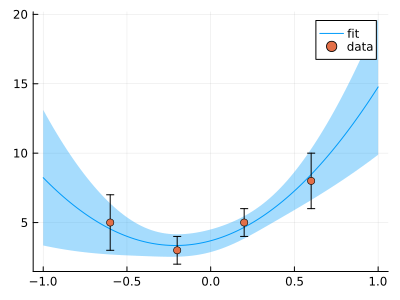

In [83]:
using Plots

function sigma_y_fit(x)
    J = [1., x,  x^2]
    return sqrt(J' * U * J)
end

xv = range(-1, 1, length=100)
yv = θ[1] .+ θ[2] .* xv + θ[3] .* xv.^2

plot(xv, yv, ribbon=sigma_y_fit.(xv), fillalpha = 0.35, label="fit", 
    size=(400,300))
scatter!(x, y, yerr=σ, label="data")